# Intervalos de confianza

**Definción**: _Par o pares de valores de números entre los cuales se estima que estará cierto valor desconocido respecto a un parámetro poblacional con un determinado nivel de confianza._

**Nivel de confianza**: Probabilidad de que el intervalo de confianza ($IC$) contenga el parámetro real de la población. <br>
**Nivel de significación**: La probabilidad de quedar fuera del intervalo, o bien es todo aquello que esta porfuera del nivel de confianza, se denota como $\alpha$. <br>

Para calcular el $IC$ se puede reapizar utlizando $z\text{-}value$ para muestras grandes (`n > 30`) o $t\text{-}value$ para muestras pequeñas (`n < 30`), en cambos casos existen tablas donde se puede encontrar el valor correspondinete si deseamos hacer el cálculo manual.

## Formula
Para muestras grandes:
$$
IC = \text{\=X} \pm z * \frac {S}{\sqrt n}
$$

Donde: 
- $\text{\=X}$: La media muestral.
- $z$: Valor $z$.
- $S$: Desviación estándar de la muestra.
- $n$: Tamaño de la muestra.

Para muestras pequeñas se sustituye $z{\text -}value$ por $t{\text -}value$.

## Cálculo de intervalor de confianza

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Para este ejercicios se utilizará el dataset `iris` para el cálculo de $IC$ del `sepal length` a un $95\%$ de nivel de confianza.

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Cálculo de $IC$

In [7]:
mean = iris["sepal_length"].mean()
std = iris["sepal_length"].std()
n = len(iris)
# Standar Error
se = std / np.sqrt(n)
z = 1.96

ic_lower = mean - (z * se)
ic_upper = mean + (z * se)

print(f"Intervalo de confianza:")
print(f"inferior = {ic_lower}, superior = {ic_upper}")
print(f"media = {mean}")

Intervalo de confianza:
inferior = 5.710815153527241, superior = 5.9758515131394265
media = 5.843333333333334


Comprobación con la libreria `statsmodels`:

In [9]:
icl, icu = sm.stats.DescrStatsW(iris["sepal_length"]).zconfint_mean()
print(f"Intervalo de confianza:")
print(f"inferior = {icl}, superior = {icu}")

Intervalo de confianza:
inferior = 5.710817588579892, superior = 5.9758490780867755


Grafica de la distribución con el intervalo de confianza al $95\%$

Text(0.5, 1.0, 'IC con un 95% de nivel de confianza')

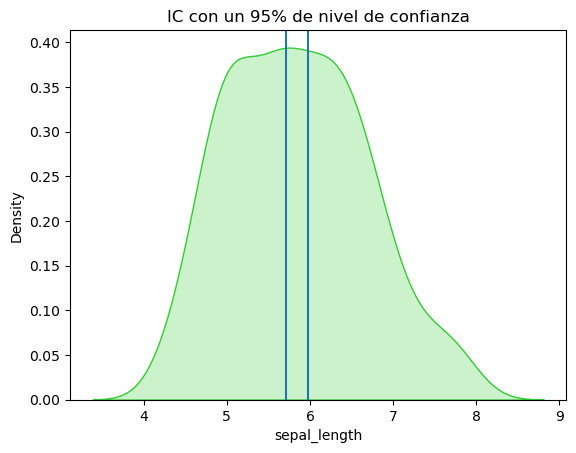

In [16]:
ax = sns.kdeplot(x=iris["sepal_length"], fill=True, color="limegreen",)
ax.axvline(x=ic_lower, ymin=0, ymax=1)
ax.axvline(x=ic_upper, ymin=0, ymax=1)
ax.set_title("IC con un 95% de nivel de confianza")